In [1]:
# import libraries
import datetime as dt
import pandas as pd
import numpy as np

# never print matching warnings
import warnings
warnings.filterwarnings('ignore')

# classic division semantics in a module
from __future__ import division

#for data visualization
import plotly.offline as pyoff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# initiate the Plotly Notebook mode to use plotly offline
init_notebook_mode(connected=True)

In [3]:
# load sales data to dataframe
data = pd.read_csv('OnlineRetail.csv',header=0, encoding = 'unicode_escape')
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France


In [4]:
# seeing full summary of the retail data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# there are null data in description and the CustomerID columns
# check and clean null data
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
dropna = data.dropna(subset=['CustomerID'])
dropna.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# check & clean duplicates data
dropna.duplicated().sum()

5225

In [8]:
dropdup = dropna.drop_duplicates()
dropdup.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# the min for unit price = 0 and the min for Quantity is a negative value
# clean up negative values most likely from refunds
retail_data = dropdup[(dropdup['Quantity'] > 0) & (dropdup['UnitPrice'] > 0)]
retail_data.describe() 

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
# checking data set size
retail_data.shape

(392692, 8)

In [11]:
# some research indicats that customer clusters vary by geography
# checking to see which country has the most customers
customer_country = retail_data[['Country','CustomerID']].drop_duplicates()
customer_country = customer_country.groupby(['Country'])['CustomerID'] \
                .aggregate('count').reset_index() \
                .sort_values('CustomerID', ascending=False)
customer_country.head()

,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


In [12]:
# restricting data to the United Kingdom only since it has the most customers
uk_data = retail_data.loc[retail_data['Country'] == 'United Kingdom']
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [13]:
# adding revenue column
uk_data['Revenue'] = uk_data['Quantity'] * uk_data['UnitPrice']
uk_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
508631,579256,22813,PACK 3 BOXES BIRD PANNETONE,12,2011-11-29 8:07,1.95,13349.0,United Kingdom,23.40
90422,544037,85232A,SET/3 POLKADOT STACKING TINS,3,2011-02-15 11:31,4.95,14961.0,United Kingdom,14.85
270633,560579,22606,WOODEN SKITTLES GARDEN SET,1,2011-07-19 15:13,15.95,15867.0,United Kingdom,15.95
31335,538935,22191,IVORY DINER WALL CLOCK,1,2010-12-15 11:08,8.50,18168.0,United Kingdom,8.50
468808,576555,22988,SOLDIERS EGG CUP,24,2011-11-15 13:01,1.25,17861.0,United Kingdom,30.00


In [14]:
# print the time period for incoive date
print('Min : {}, Max : {}'.format(min(uk_data.InvoiceDate), max(uk_data.InvoiceDate)))

Min : 2010-12-01 10:19, Max : 2011-12-09 9:46


In [15]:
# convert InvoiceDate to datetime from string
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

# recency is calculated for a point in time, and the last invoice date is 2011–12–09
# will use 2011–12–10 to calculate recency
NOW = dt.datetime(2011,12,10)

In [16]:
# RECENCY (R): Days since last purchase
# FREQUENCY (F): Total number of purchases
# MONETARY VALUE (M): Total money this customer spent
# customer segmentation technique that uses past purchase behavior to divide customers into groups

In [17]:
# calculate RFM values
# group the data for each customer &
# aggregate it for each recency, frequency, and monetary value
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (NOW - x.max()).days,
                                         'InvoiceNo' : 'count', 'Revenue' : 'sum'})

# rename the columns
rfm.rename(columns = {'InvoiceDate' : 'Recency',
                      'InvoiceNo' : 'Frequency',
                      'Revenue' : 'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4412,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [18]:
# Cause these are continuous values, we can use the quantile values and divide them into 4 groups
# create labels and assign them to percentile groups 
# order of the labels matter
# for recency the smaller the value the more engaged
r_labels = range(1, 5)
f_labels = range(4, 0, -1)
m_labels = range(4, 0, -1)

# use qcut() to put variable into equal-sized bins
# bins needs to be one fewer the what is 
r_groups = pd.qcut(rfm.Recency, q = 4, labels = r_labels)
f_groups = pd.qcut(rfm.Frequency, q = 4, labels = f_labels)
m_groups = pd.qcut(rfm.Monetary, q = 4, labels = m_labels)

In [19]:
# make a new column for group labels
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

# RFM_Value is the total sum of the three values
rfm['RFM_Score'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Value'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Value
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9.0
12747.0,2,103,4196.01,1,1,1,111,3.0
12748.0,0,4412,33053.19,1,1,1,111,3.0
12749.0,3,199,4090.88,1,1,1,111,3.0
12820.0,3,59,942.34,1,2,2,122,5.0


In [20]:
# now we can sort and qury customers based on RFM_Score, 111 is the highest score
# top spending customers
rfm[rfm['RFM_Score'] == '111'].sort_values('Monetary', ascending = False).head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Value
CustomerID,,,,,,,,
18102.0,0,431,259657.30,1,1,1,111,3.0
17450.0,8,336,194390.79,1,1,1,111,3.0
17511.0,2,963,91062.38,1,1,1,111,3.0
16684.0,4,277,66653.56,1,1,1,111,3.0
14096.0,4,5111,65164.79,1,1,1,111,3.0


In [21]:
# most frequent customers
rfm[rfm['RFM_Score'] == '111'].sort_values('Frequency', ascending = False).head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Value
CustomerID,,,,,,,,
17841.0,1,7676,40519.84,1,1,1,111,3.0
14096.0,4,5111,65164.79,1,1,1,111,3.0
12748.0,0,4412,33053.19,1,1,1,111,3.0
14606.0,1,2677,12076.15,1,1,1,111,3.0
15311.0,0,2366,60632.75,1,1,1,111,3.0


In [22]:
# RFM_Value can be used to categorize customers
# assign labels from total score
score_labels = ['Best Customers', 'Loyal Customers', 'Big Spenders', 'Almost Lost', 'Lost Customers', 'Lost Cheap Customers']
score_groups = pd.qcut(rfm.RFM_Value, q = 6, labels = score_labels)
rfm['RFM_Segment'] = score_groups.values
rfm.sample(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Value,RFM_Segment
CustomerID,,,,,,,,,
14854.0,78,126,2740.03,3,1,1,311,5.0,Loyal Customers
17785.0,53,13,131.94,3,4,4,344,11.0,Lost Customers
14466.0,29,72,2272.40,2,2,1,221,5.0,Loyal Customers
15412.0,171,10,190.53,4,4,4,444,12.0,Lost Cheap Customers
15969.0,2,20,666.10,1,3,2,132,6.0,Loyal Customers
17026.0,185,4,154.83,4,4,4,444,12.0,Lost Cheap Customers
14976.0,57,72,790.86,3,2,2,322,7.0,Big Spenders
16392.0,269,43,217.89,4,2,4,424,10.0,Lost Customers
14226.0,28,66,2214.79,2,2,1,221,5.0,Loyal Customers


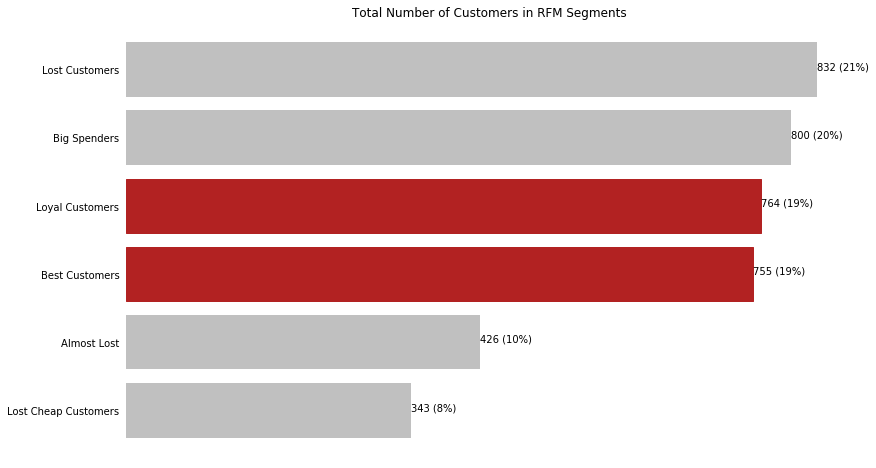

In [23]:
# count the number of customers in each category
segment_counts = rfm['RFM_Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(13, 8))

plt.title('Total Number of Customers in RFM Segments')

bars = ax.barh(range(len(segment_counts)), segment_counts,
              color='silver')

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

ax.set_yticks(range(len(segment_counts)))
ax.set_yticklabels(segment_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        
        if segment_counts.index[i] in ['Best Customers', 'Loyal Customers']:
            bar.set_color('firebrick')
            
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                     int(value*100/segment_counts.sum())))

plt.show()